In [1]:
import pandas as pd
import numpy as np
import sympy as sy
from math import ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dylansdata = pd.read_csv("/6-0-5-8/toric-6-0-5-8_stats.csv")

In [3]:
dylansdata1 = pd.read_csv("/6-0-5-8/toric-6-0-5-8_degree.csv")

In [4]:
dylansdata2 = pd.read_csv("/6-0-5-8/toric-6-0-5-8.csv")

In [5]:
toricd = dylansdata2.join(dylansdata)

In [6]:
toric = toricd.join(dylansdata1)

In [7]:
X = np.load("/Users/urosmojsilovic/Desktop/ToricIdeals/6-0-5-8/toric-6-0-5-8.npy", allow_pickle = True)

In [8]:
arr = []
for i in X:
    arr.append(len(i))

In [9]:
toric["NumGens"] = arr

In [10]:
arr2 = []
arr3 = []
arr4 = []
for i in X:
    for j in i:
        a = j[0] + j[1] + j[2] + j[3] + j[4] + j[5] + j[6] + j[7]
        b = j[8] + j[9] + j[10] + j[11] + j[12] + j[13] + j[14] + j[15]
        arr2.append(a)
        arr2.append(b)
        arr3.append(np.array(arr2))
        arr2 = []
    arr4.append(np.array(arr3))
    arr3 = []

In [11]:
arr5 = []
arr6 = []
for i in arr4:
    for j in i:
        arr5.append(j[0])
    arr6.append(np.array(arr5))
    arr5 = []

In [12]:
arr7 = []
for i in arr6:
    arr7.append(np.amin(i))
            

In [13]:
toric["MinDeg"] = arr7

In [14]:
arr10 = []
for i in arr6:
    arr10.append(np.amax(i))
            

In [15]:
toric["MaxDeg"] = arr10

In [30]:
arr8 = []
for i in arr6:
    arr8.append(np.mean(i))

In [31]:
dylansdata["MeanDeg"] = arr8 

In [17]:
dylansdata = toric

In [19]:
dylansdata.to_csv("1toric6-0-5-8-better.csv")

In [33]:
corr = dylansdata.corr()
#corr() is the pearson correlation coeefficient

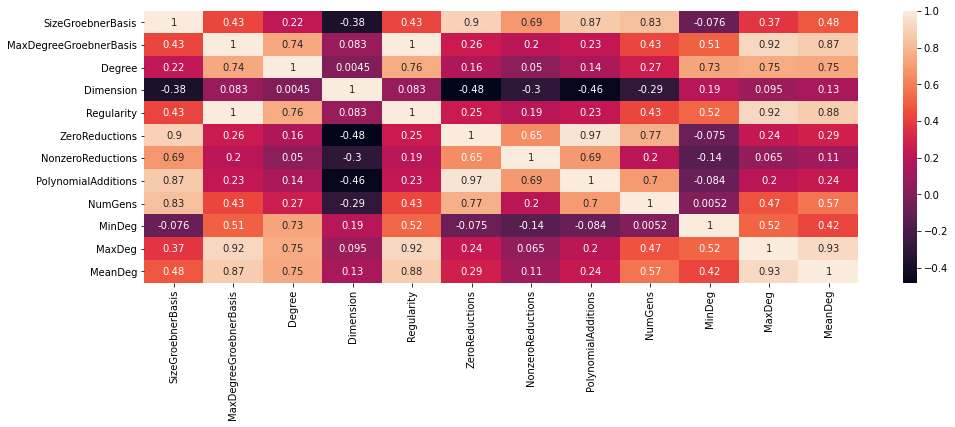

In [34]:
plt.figure(figsize=(16,5))
sb.heatmap(corr, annot = True)

In [35]:
dylansdata.describe() 

,SizeGroebnerBasis,MaxDegreeGroebnerBasis,Degree,Dimension,Regularity,ZeroReductions,NonzeroReductions,PolynomialAdditions,NumGens,MinDeg,MaxDeg,MeanDeg
count,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000,325927.000000
mean,9.147082,48.783280,173.729666,5.950922,49.899824,14.267124,1.812851,31.121076,7.387507,8.890153,43.479681,26.583490
std,9.596962,47.905852,184.939636,0.217843,47.821633,27.635862,6.026881,68.387114,6.832666,5.633382,43.067013,23.194322
min,2.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
25%,5.000000,20.000000,58.000000,6.000000,21.000000,6.000000,0.000000,12.000000,4.000000,5.000000,17.000000,12.200000
50%,7.000000,35.000000,117.000000,6.000000,36.000000,9.000000,0.000000,20.000000,6.000000,8.000000,31.000000,20.250000
75%,10.000000,61.000000,222.000000,6.000000,62.000000,14.000000,2.000000,32.000000,9.000000,12.000000,54.000000,33.285714
max,1045.000000,1292.000000,5200.000000,6.000000,1292.000000,4082.000000,1080.000000,9056.000000,1044.000000,68.000000,1292.000000,625.554945


In [23]:
X = dylansdata["NumGens"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.487
Model:                             OLS   Adj. R-squared:                  0.487
Method:                  Least Squares   F-statistic:                 3.089e+05
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:39:38   Log-Likelihood:            -1.7309e+06
No. Observations:               325927   AIC:                         3.462e+06
Df Residuals:                   325925   BIC:                         3.462e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.4579      0.126   -161.842      0.000     -20.706     -20.210
NumGens        6.9819      0.013    555.809      0.000       6.957       7.007
==============================================================================
Omnibus:                  1038798.841   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     502571152459.699
Skew:                          51.401   Prob(JB):                         0.00
Kurtosis:                    6085.501   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = dylansdata["MeanDeg"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.059
Model:                             OLS   Adj. R-squared:                  0.059
Method:                  Least Squares   F-statistic:                 2.040e+04
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:43:48   Log-Likelihood:            -1.8297e+06
No. Observations:               325927   AIC:                         3.659e+06
Df Residuals:                   325925   BIC:                         3.659e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0977      0.177     68.443      0.000      11.751      12.444
MeanDeg        0.7156      0.005    142.832      0.000       0.706       0.725
==============================================================================
Omnibus:                   922883.511   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     137250353315.313
Skew:                          37.136   Prob(JB):                         0.00
Kurtosis:                    3181.218   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X = dylansdata["Degree"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     6672.
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:39:39   Log-Likelihood:            -1.8363e+06
No. Observations:               325927   AIC:                         3.673e+06
Df Residuals:                   325925   BIC:                         3.673e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0219      0.163    135.357      0.000      21.703      22.341
Degree         0.0524      0.001     81.685      0.000       0.051       0.054
==============================================================================
Omnibus:                   905410.118   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     118936266716.381
Skew:                          35.270   Prob(JB):                         0.00
Kurtosis:                    2961.552   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = dylansdata["MaxDeg"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.040
Method:                  Least Squares   F-statistic:                 1.374e+04
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:39:40   Log-Likelihood:            -1.8328e+06
No. Observations:               325927   AIC:                         3.666e+06
Df Residuals:                   325925   BIC:                         3.666e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2347      0.167    103.362      0.000      16.908      17.561
MaxDeg         0.3194      0.003    117.219      0.000       0.314       0.325
==============================================================================
Omnibus:                   914486.800   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     128129084227.094
Skew:                          36.230   Prob(JB):                         0.00
Kurtosis:                    3073.778   Cond. No.                         87.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X = dylansdata["MinDeg"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     2321.
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:39:43   Log-Likelihood:            -1.8384e+06
No. Observations:               325927   AIC:                         3.677e+06
Df Residuals:                   325925   BIC:                         3.677e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1966      0.223    180.249      0.000      39.760      40.634
MinDeg        -1.0208      0.021    -48.179      0.000      -1.062      -0.979
==============================================================================
Omnibus:                   899662.491   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     113372125803.979
Skew:                          34.673   Prob(JB):                         0.00
Kurtosis:                    2891.507   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = dylansdata["Regularity"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.051
Model:                             OLS   Adj. R-squared:                  0.051
Method:                  Least Squares   F-statistic:                 1.757e+04
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:39:45   Log-Likelihood:            -1.8310e+06
No. Observations:               325927   AIC:                         3.662e+06
Df Residuals:                   325925   BIC:                         3.662e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9805      0.169     88.831      0.000      14.650      15.311
Regularity     0.3235      0.002    132.566      0.000       0.319       0.328
==============================================================================
Omnibus:                   918223.744   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     133045719691.379
Skew:                          36.627   Prob(JB):                         0.00
Kurtosis:                    3132.154   Cond. No.                         99.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X = dylansdata["Dimension"]
y = dylansdata["PolynomialAdditions"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.214
Model:                             OLS   Adj. R-squared:                  0.214
Method:                  Least Squares   F-statistic:                 8.885e+04
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:39:46   Log-Likelihood:            -1.8003e+06
No. Observations:               325927   AIC:                         3.601e+06
Df Residuals:                   325925   BIC:                         3.601e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        895.7733      2.903    308.602      0.000     890.084     901.463
Dimension   -145.2972      0.487   -298.080      0.000    -146.253    -144.342
==============================================================================
Omnibus:                   977380.681   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     241538071495.924
Skew:                          43.398   Prob(JB):                         0.00
Kurtosis:                    4219.443   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Multiple linear regression on the sample data, and we pull coefficients 
X = dylansdata[["MaxDeg", "MinDeg", "Degree", "Regularity", "MeanDeg", "NumGens", "Dimension"]]
Y = dylansdata["PolynomialAdditions"]
X  = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PolynomialAdditions   R-squared:                       0.593
Model:                             OLS   Adj. R-squared:                  0.593
Method:                  Least Squares   F-statistic:                 6.783e+04
Date:                 Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                         22:44:59   Log-Likelihood:            -1.6931e+06
No. Observations:               325927   AIC:                         3.386e+06
Df Residuals:                   325919   BIC:                         3.386e+06
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.6169      2.654    123.428      0.000     322.414     332.819
MaxDeg        -0.1572      0.006    -25.521      0.000      -0.169      -0.145
MinDeg        -1.5094      0.023    -64.818      0.000      -1.555      -1.464
Degree         0.0745      0.001     76.680      0.000       0.073       0.076
Regularity     0.4411      0.004    102.323      0.000       0.433       0.450
MeanDeg       -1.3047      0.012   -108.805      0.000      -1.328      -1.281
NumGens        7.5923      0.017    449.114      0.000       7.559       7.625
Dimension    -55.8890      0.451   -123.903      0.000     -56.773     -55.005
==============================================================================
Omnibus:                  1134793.228   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1122587603439.767
Skew:                          66.552   Prob(JB):                         0.00
Kurtosis:                    9093.945   Cond. No.                     9.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#use the results from the multiple linear regression to pick our "important" features in 
#predicting Polynomial Additions. Then we take a closer look at these features. Histograms: 

(array([1.9319e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6587e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8056e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2276e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7158e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7546e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2944e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2290e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8624e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7286e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3739e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2691e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.4730e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.1810e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.8230e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.14

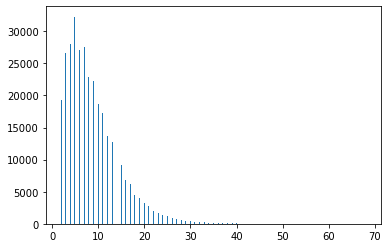

In [44]:
#MinDeg
plt.hist(dylansdata["MinDeg"], bins = 'auto')

(array([9.200e+02, 1.134e+03, 1.990e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([  2.        ,   2.61252942,   3.22505883, ..., 624.32988622,
        624.94241564, 625.55494505]),
 <a list of 1018 Patch objects>)

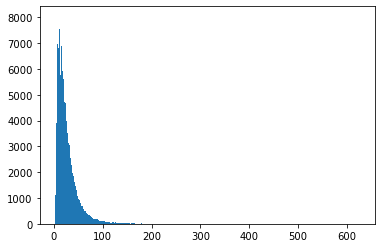

In [45]:
#MinDeg
plt.hist(dylansdata["MeanDeg"], bins = 'auto')

(array([1.924e+03, 4.612e+03, 6.203e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([3.00000000e+00, 7.76351971e+00, 1.25270394e+01, ...,
        5.19047296e+03, 5.19523648e+03, 5.20000000e+03]),
 <a list of 1091 Patch objects>)

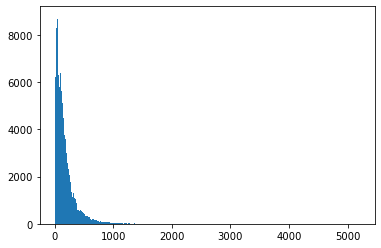

In [46]:
#MinDeg
plt.hist(dylansdata["Degree"], bins = 'auto')

(array([3.25829e+05, 8.80000e+01, 7.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   2. ,  106.2,  210.4,  314.6,  418.8,  523. ,  627.2,  731.4,
         835.6,  939.8, 1044. ]),
 <a list of 10 Patch objects>)

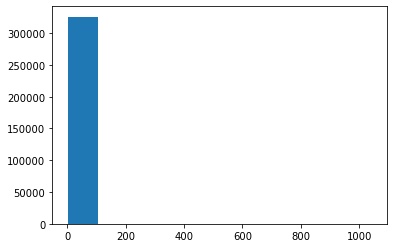

In [51]:
#MinDeg
plt.hist(dylansdata["NumGens"])